Student: Sirajum Monira Bipasha 2325118 and student id (OID): 1.2.246.562.24.47437189544
Read in data in bb.csv. The fourth column contains a value that should be predicted based on three first column values.

Standardise the values (no need to split into training, validation and test sets), and then

* Create a regularised (use sum of weights squared regularisation) model to see the coefficient point estimates
* Create a Bayesian variant of the same model, compare the model parameter means to point estamates and report findings. Record also uncertainty of the parameters (the co-variance matrix sigma).
* Create a Bayesiam model by creating pymc model and sample from it. Use both Normal and Uniform priors for the parameters - are there any differences? Compare the statistics calculated from samples with the previous step and report findings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pymc as pm
import scipy

from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.preprocessing import StandardScaler

In [2]:
bb_data = np.loadtxt('/content/bb.csv', delimiter=',', dtype=float, skiprows=1)

In [3]:
# test
assert(bb_data.shape[0] == 41)
assert(bb_data.shape[1] == 4)

In [4]:
x = bb_data[:, :-1]
y = bb_data[:,-1]

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

In [5]:
model_ridge = Ridge().fit(scaled_x,y)
print(model_ridge.coef_)

[ 1.36620647  2.20515635 -8.1574815 ]


In [6]:
model_bayesianridge = BayesianRidge().fit(x,y)
print(model_bayesianridge.coef_)
print(model_bayesianridge.sigma_)

[ 0.12185417  0.53522567 -0.92685202]
[[ 0.00872365  0.00805709 -0.00304749]
 [ 0.00805709  0.0598579  -0.00436602]
 [-0.00304749 -0.00436602  0.01113733]]


In [9]:
initial_model = pm.Model()

with initial_model:

    # Priors for unknown model parameters
    # ...
    w0 = pm.Normal("w0", mu=0, sigma=10)
    w1 = pm.Normal("w1", mu=0, sigma=10)
    w2 = pm.Normal("w2", mu=0, sigma=10)
    w3 = pm.Normal("w3", mu=0, sigma=10)
    # Expected value of outcome
    mu = w0 + w1*x[:,0] + w2*x[:,1] + w3*x[:,2]

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal("y_obs", mu=mu, observed=y)

    # draw posterior samples
    trace = pm.sample(3000, tune=2000)

Output()

Output()

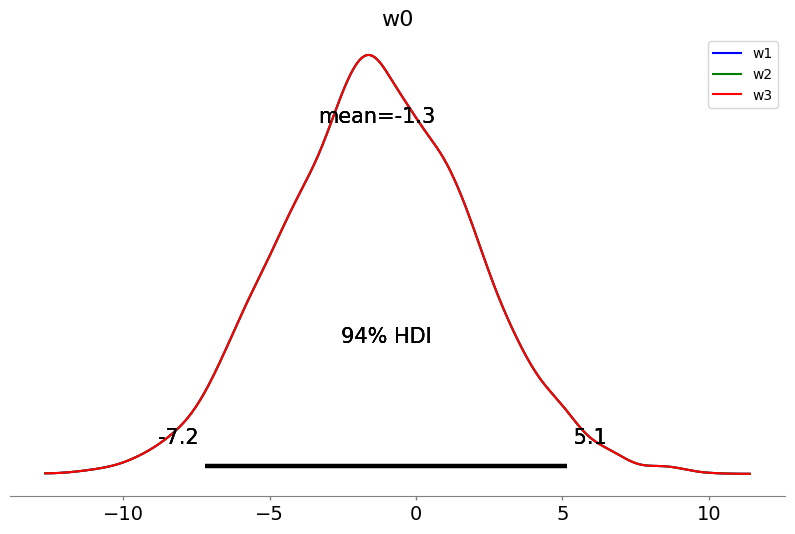

In [20]:

plt.figure(figsize=(10, 6))

for w, color in zip(['w1', 'w2', 'w3'], ['b', 'g', 'r']):
    pm.plot_posterior(trace, label=f"{w}", color=color, ax=plt.gca())
plt.legend()
plt.show()